# DataCamp Certification Case Study

### Project Brief

You are on the data science team for a coffee company that is looking to expand their business into Ukraine. They want to get an understanding of the existing coffee shop market there.

You have a dataset from Google businesses. It contains information about coffee shops in Ukraine. The marketing manager wants to identify the key coffee shop segments. They will use this to construct their marketing plan. In their current location, they split the market into 5 segments. The marketing manager wants to know how many segments are in this new market, and their key features.

You will be presenting your findings to the Marketing Manager, who has no data science background.

The data you will use for this analysis can be accessed here: `"data/coffee_shops.csv"`

# <strong>Content</strong>
- Motivation
- Dataset Description
- Analysis Plan
- Performance Metrics
- Exploratory Data Analysis
- Exploratory Data Analysis Summary
- Model Development
- Conclusion
- References



#  Motivation

Europe is the largest coffee market in the world, accounting for about one-third of global consumption. Although consumption is expected to stabilise in the long term, Europe will remain attractive to coffee exporters. Especially the growing specialty coffee market in Europe offers interesting opportunities. In this project we will focus on the coffe market in Ukraine and help the company to identify the main segments and their key features by understanding the exsiting coffee shops in this market.


##  Dataset Description 
Ukrainian coffee shops dataset has been provided by Google businesses an accessed in   `"data/coffee_shops.csv"`.


###  Data Description
<p>The data consists of 9 features </p>

| Feature | Description | Type |
| --- | --- | --- |
|Region| SHop location|object|
|Place name |  Name of the shop|object|
|Place type | The type of coffee shop |object|
|Rating | Coffee shop rating |numerical|
|Reviews | number of reviews provided for the shop|numerical|
|Price | price category |object|
|Delivery option| describing, whether there is (or isn’t) a delivery option|object|
|Dine in option |  describing whether there is or isn’t (missing) a dine-in option|object|
|Takeout option|  describing whether there is or isn’t (missing) a takeout option| object|




#  Analysis Plan
<p>This is an unsupervised clustering problem when we will identify the main segments by regions and their key features.<br>
The following steps will be followed</p>

1. Identify possible suitable performance metrics to measure the success of the analysis.
2. Apply exploratory data analysis to get insights about the data and detect problems in the dataset. 
3. Select a suitable algorithm for model training to segment our dataset. 
4. Provide discussions about the ways to improve the model. 


#  Performance Metrics 

In Clustering validation we evaluate the result of a cluster objectively and quantitativel,we will do this validation by applying the elbow Method: 

#### Elbow Method
Elbow Method is an empirical method to find the optimal number of clusters for a dataset. In this method, we pick a range of candidate values of k, then apply K-Means clustering using each of the values of k. Find the average distance of each point in a cluster to its centroid, and represent it in a plot

#  Exploratory Data Analysis

In this section, an initial exploratory analysis of the dataset will be done. The dataset will be
evaluated for any data quality problems that have to be resolved.

- Let's begin with importing needed modules for the analysis:


In [1]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings,time
from scipy import stats
from sklearn.impute import SimpleImputer
warnings.filterwarnings("ignore")

### Loading and Cleaning The Data:

- Loading data from the path provided. 
- Checking for and filling the missing values .
- Checking for and droping  duplicates.
- Checking for other transformation.

In [2]:
data = pd.read_csv('data/coffee_shops.csv')
data

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,Mariupol,Dim Kavu,Coffee store,4.6,206.0,NaN,NaN,NaN,NaN
1,Mariupol,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,Mariupol,Кофейня Світ Чаю,Coffee shop,5.0,11.0,NaN,NaN,NaN,True
3,Mariupol,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,Mariupol,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,NaN,NaN,True,True
...,...,...,...,...,...,...,...,...,...
195,Dnipro,Artist,Restaurant,4.6,963.0,$$$,NaN,True,True
196,Dnipro,Dream Cafe,Cafe,4.3,646.0,$$,False,True,True
197,Dnipro,РУТА КАФЕ ПП КУЛІЧЕНКО К.І.,Cafe,4.6,16.0,$$,False,True,True
198,Dnipro,Ob'yektna Kava,Coffee shop,4.7,599.0,$$,NaN,True,True


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            122 non-null    object 
 6   Delivery option  129 non-null    object 
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: float64(2), object(7)
memory usage: 14.2+ KB


In [4]:
data.isnull().sum()

Region              0
Place name          0
Place type          0
Rating              2
Reviews             2
Price              78
Delivery option    71
Dine in option     60
Takeout option     56
dtype: int64

In [5]:
data.duplicated().sum()

0

- The dataset consists of 200 entries and 9 Features.
- There are no duplicates in the dataset.
- There are features with missing values need some imputation.
- The data is not large enough to get accurate results from the analysis.

In [3]:
# Seperating categorical columns from numerical columns
num_data = data.select_dtypes(exclude='object')
cat_data = data.select_dtypes(include='object')

#Defining Imputer for each column type
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

#Saving column names for each type
num_cols = num_data.columns
cat_cols = cat_data.columns

#Performing SimpleImputer with mean strategy on numerical features and renaming columns
num_data = pd.DataFrame(imputer_num.fit_transform(num_data))
num_data.columns = num_cols

#Performing SimpleImputer with mpst frequent strategy on categorical features and renaming columns
cat_data = pd.DataFrame(imputer_cat.fit_transform(cat_data))
cat_data.columns= cat_cols

#add numerical features to categorical to get our final dataset with no missing values
data= pd.concat([cat_data,num_data],axis=1)

data
    

,Region,Place name,Place type,Price,Delivery option,Dine in option,Takeout option,Rating,Reviews
0,Mariupol,Dim Kavu,Coffee store,$$,False,True,True,4.6,206.0
1,Mariupol,Коферум,Cafe,$$,False,True,True,5.0,24.0
2,Mariupol,Кофейня Світ Чаю,Coffee shop,$$,False,True,True,5.0,11.0
3,Mariupol,Кофейня Starcoff,Coffee shop,$$,False,True,True,4.4,331.0
4,Mariupol,"Кофейня ""Friend Zone""",Coffee shop,$$,False,True,True,5.0,12.0
...,...,...,...,...,...,...,...,...,...
195,Dnipro,Artist,Restaurant,$$$,False,True,True,4.6,963.0
196,Dnipro,Dream Cafe,Cafe,$$,False,True,True,4.3,646.0
197,Dnipro,РУТА КАФЕ ПП КУЛІЧЕНКО К.І.,Cafe,$$,False,True,True,4.6,16.0
198,Dnipro,Ob'yektna Kava,Coffee shop,$$,False,True,True,4.7,599.0


In [7]:
data.isnull().sum()

Region             0
Place name         0
Place type         0
Price              0
Delivery option    0
Dine in option     0
Takeout option     0
Rating             0
Reviews            0
dtype: int64

##### Numerical Features

In [8]:
data.describe()

,Rating,Reviews
count,200.000000,200.000000
mean,4.663636,622.494949
std,0.220531,1393.841198
min,3.900000,3.000000
25%,4.600000,48.500000
50%,4.700000,277.000000
75%,4.800000,780.750000
max,5.000000,17937.000000


- The maximum number of reviews  17937 .
- The maximum rating for a shop is 5/5.
- The average rating for all the shops is nearly 622.5.
- The average Rating for all the shops is 4.66/5.
- We observe that most of the shops in ukraine are well reviewed and rated.

##### Categorical Features 

In [9]:
data.describe(include='object')

,Region,Place name,Place type,Price,Delivery option,Dine in option,Takeout option
count,200,200,200,200,200,200,200
unique,10,187,14,3,2,1,1
top,Kharkiv,Dim Kavy,Coffee shop,$$,False,True,True
freq,20,4,97,194,165,200,200


In [10]:
for col in cat_cols:
    print(data[col].value_counts() , end='\n')

Kharkiv        20
Zaporozhye     20
Dnipro         20
Kiev           20
Kherson        20
Khrivoy Rog    20
Lviv           20
Odessa         20
Poltava        20
Mariupol       20
Name: Region, dtype: int64
Dim Kavy                   4
Coffee House               3
coffee House               3
SV Кафе                    2
MY COFFEE                  2
                          ..
Lviv Handmade Chocolate    1
Saturdays Coffee Цирк      1
Бамбук                     1
Ob'yektna Kava             1
Tea, Coffee Shop           1
Name: Place name, Length: 187, dtype: int64
Coffee shop                 97
Cafe                        58
Espresso bar                20
Coffee store                11
Store                        3
Coffee roasters              2
Pastry shop                  2
E-commerce service           1
Chocolate shop               1
Restaurant                   1
Internet shop                1
European restaurant          1
Appliance repair service     1
Coffee stand               

- There are 10  different regions in the dataset and each region with 20 rows observations. 
- There are 14 different Place Type, some seems to be not well represented.
- There are  187 unique shop names the most frequent is **Coffe House** with 6 shops then **Dim Kavy** with 4 shops,.
- All shops offer Dine in and Takeout options.
- Most of the shops do not deliver.
- Most of the shop are with affordable price.

##### Transforming Place type and Price Columns 

In [4]:

data['Price'] = data['Price'].replace({'$':'cheap','$$':'affordable','$$$':'expensive'}) 
data['Place type'] = data['Place type'].replace({'Store': 'Other',
                            'Pastry shop': 'Other',
                            'Coffee roasters': 'Other',
                            'Appliance repair service': 'Other',
                            'Internet shop': 'Other',
                            'Restaurant': 'Other',
                            'Coffee stand': 'Other',
                            'Chocolate shop': 'Other',
                            'European restaurant': 'Other',
                            'E-commerce service': 'Other',
                            'Coffee store':'Coffee shop'})
print(data['Price'].value_counts())
print(data['Place type'].value_counts())

affordable    194
expensive       4
cheap           2
Name: Price, dtype: int64
Coffee shop     108
Cafe             58
Espresso bar     20
Other            14
Name: Place type, dtype: int64


### Data Exploration with Plots and Graphs:

- As we saw, all the shops offer a Dine in and take out options, so in the analysis below we will focus more on the other numerical and categorical features.

<AxesSubplot:xlabel='Reviews'>

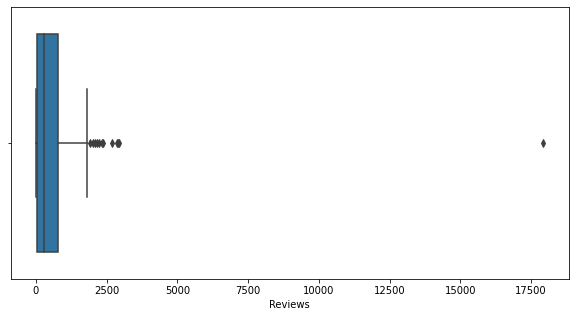

In [62]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data,x='Reviews')

In [5]:
data  = data[data.Reviews != data.Reviews.max()]
data

,Region,Place name,Place type,Price,Delivery option,Dine in option,Takeout option,Rating,Reviews
0,Mariupol,Dim Kavu,Coffee shop,affordable,False,True,True,4.6,206.0
1,Mariupol,Коферум,Cafe,affordable,False,True,True,5.0,24.0
2,Mariupol,Кофейня Світ Чаю,Coffee shop,affordable,False,True,True,5.0,11.0
3,Mariupol,Кофейня Starcoff,Coffee shop,affordable,False,True,True,4.4,331.0
4,Mariupol,"Кофейня ""Friend Zone""",Coffee shop,affordable,False,True,True,5.0,12.0
...,...,...,...,...,...,...,...,...,...
195,Dnipro,Artist,Other,expensive,False,True,True,4.6,963.0
196,Dnipro,Dream Cafe,Cafe,affordable,False,True,True,4.3,646.0
197,Dnipro,РУТА КАФЕ ПП КУЛІЧЕНКО К.І.,Cafe,affordable,False,True,True,4.6,16.0
198,Dnipro,Ob'yektna Kava,Coffee shop,affordable,False,True,True,4.7,599.0


- We found that there is an outlier need to be removed from the dataset

<AxesSubplot:xlabel='Rating'>

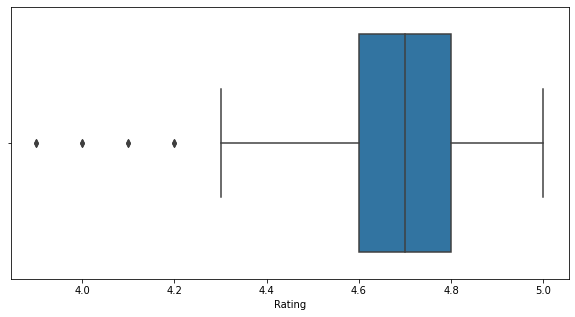

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data,x='Rating')

-  There are some outliers but they are acceptable and will  not affect the analysis 

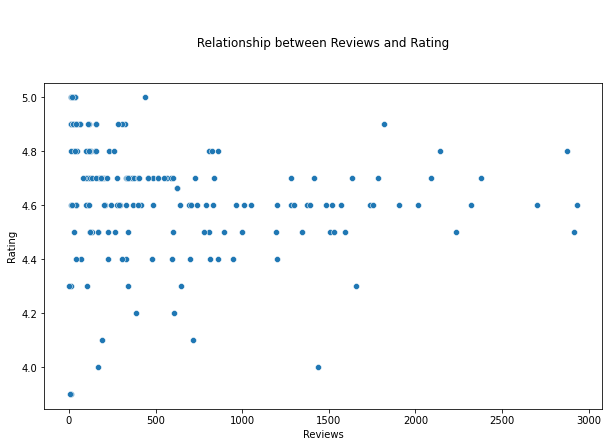

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Reviews',y='Rating',data=data)
plt.title('\n\n Relationship between Reviews and Rating \n\n')
plt.show()

##### Numerical Features vs Each Categorical Features

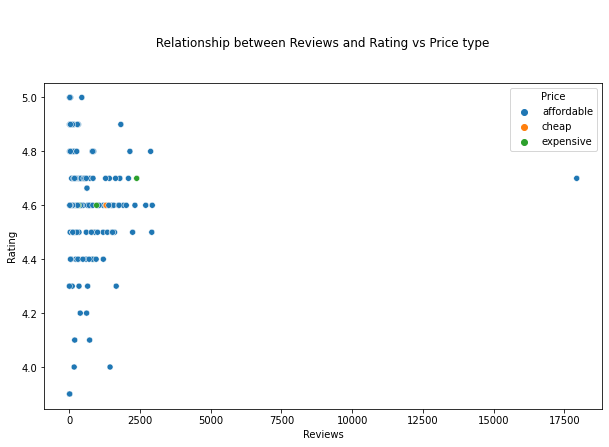

In [75]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Reviews', y = 'Rating', hue = 'Price', data = data)
plt.title('\n\n Relationship between Reviews and Rating vs Price type \n\n')
plt.savefig(f'images/ReviewsRatingVsPricetype.png')
plt.show()

- As mentionned in the exploration above most of the shops are with affordable prices and from this plot we observe that they are the shops the highest rated, and the expensive are rated lower. 

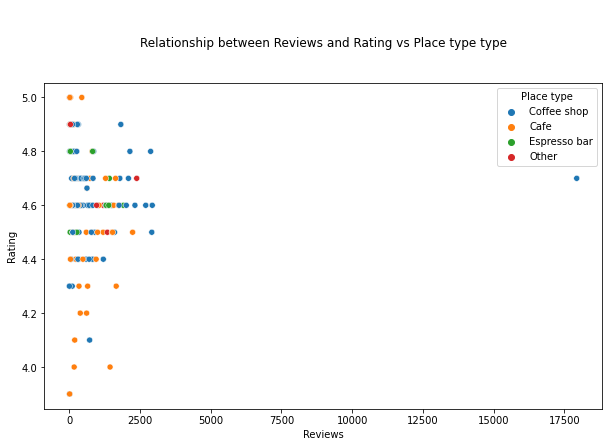

In [76]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Reviews', y = 'Rating', hue = 'Place type', data = data)
plt.title('\n\nRelationship between Reviews and Rating vs Place type type\n\n ')
plt.savefig(f'images/ReviewsRatingVsPlacetype.png')
plt.show()

- Also  We observe that coffe shops are the highest rated followed by the Espresso bars.

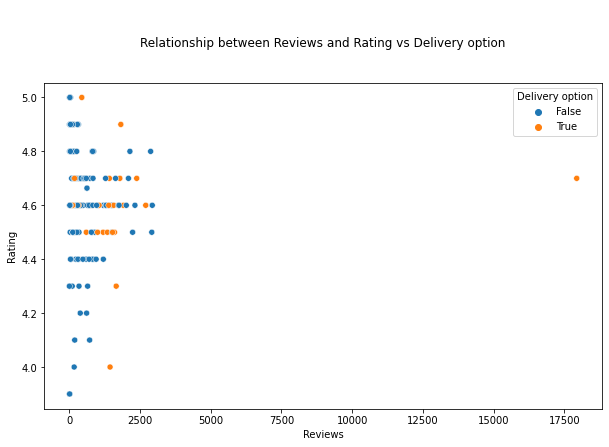

In [77]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Reviews', y = 'Rating', hue = 'Delivery option', data = data)
plt.title('\n\nRelationship between Reviews and Rating vs Delivery option\n\n ')
plt.savefig(f'images/ReviewsRatingVsDeliveryoption.png')
plt.show()

 - Even of the small number of shops that offer a delivery option we observe that most of them  are highly rated.

##### Region vs Other Features

Text(0.5, 1.0, '\nRegion vs Place type\n\n ')

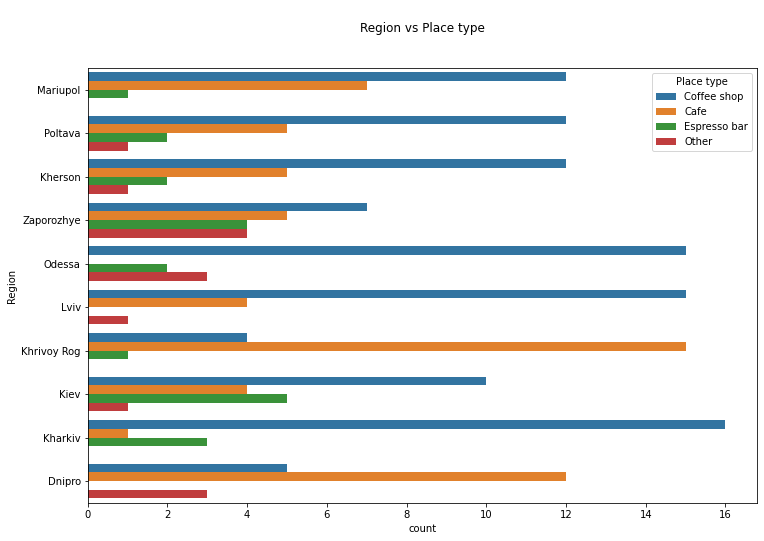

In [78]:
plt.figure(figsize=(12,8))
sns.countplot(y = 'Region', hue = 'Place type', data = data)
plt.savefig(f'images/RegionVsPlacetype.png')
plt.title('\nRegion vs Place type\n\n ' )    

- AS  we know the coffee shop are the most exsisted in our dataset and it located in all the regions but we observe that it locate more in **Kharkiv** region, we observe also that Espresso bars exists the most in **Zaporozhye** and **Kiev**, and cafe is located more in **Khrivoy Rog**.

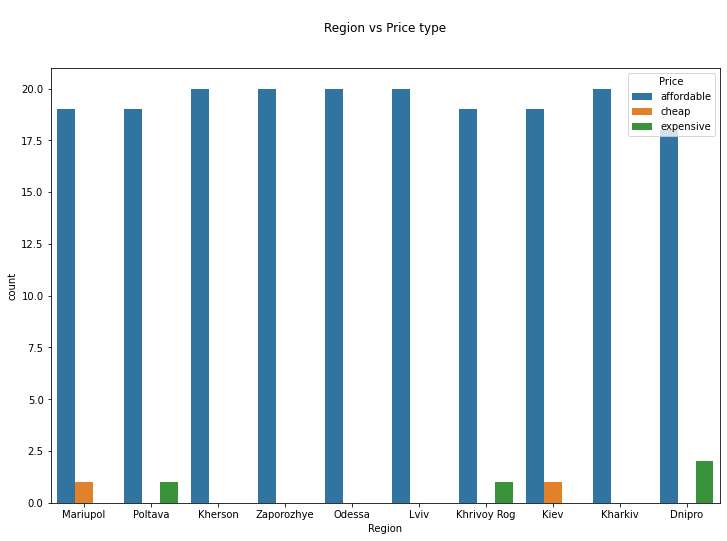

In [79]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'Region', hue = 'Price', data = data)
plt.savefig(f'images/RegionVsPrice.png')
plt.title('\nRegion vs Price type\n\n ' ) 
plt.show()

- Affordable prices are the most frequent across all regions, we observe that **Mariupol** and **Kiev** are the only 2 regions that have shops with cheap prices,  and **Poltava**, **Khrivoy rog** and **Dinipro** are with the only regions with expensive prices.

Text(0.5, 1.0, '\nRegion vs Delivery option\n\n ')

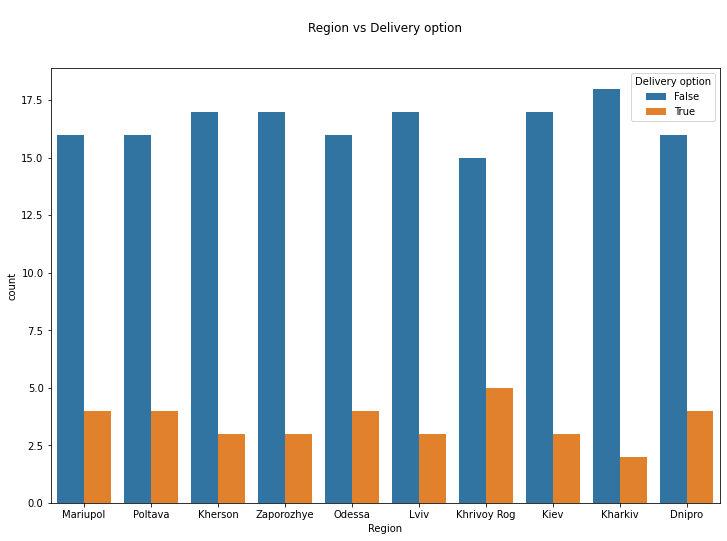

In [80]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'Region', hue = 'Delivery option', data = data)
plt.savefig(f'images/RegionVsDelivery.png')
plt.title('\nRegion vs Delivery option\n\n ' ) 

- As the Take out and the dine in option also most of shops in all regions offer delivery option.

# Exploratory Data Analysis Summary
The dataset consists of 200 samples and it is not large enough for the analysis, there are some features with missing values filled with the mean or the mode, and there are no duplicates. There are categorical data need encoding, and the other numerical features need to be scaled. From the analysis we found that the shops the most commun across all regions are the coffee shops and most of them are highly rated, reviewed, with affordable prices and offer delivery, take out and dine in options.

# Model Developement
For this problem a clustering algorithm will perfom well, in our case we will use K-means Cluster Algorithm, to find the optimum number of clusters we will use the Elbow method. Before modelling categorical features will be encoded and transformed using On Hot Encoder and the numerical features will be scaled using the Standard Scaler.Then we will analyse our findings.

#### Importing needed packages

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#### Perform One Hot Encoding for categorical features on both train and test data

In [8]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

cat_cols = [cname for cname in cat_cols if data[cname].nunique() < 10 ]
#perform one hot encoding to categorical features
OH_data = pd.DataFrame(OH_encoder.fit_transform(data[cat_cols]))

# One-hot encoding removed index we will put it back
OH_data.index = data.index

#renaming columns 
OH_data.columns = OH_encoder.get_feature_names(cat_cols)

# Remove categorical columns (will replace with one-hot encoding)
num_data = data.drop(data.select_dtypes(include="object"), axis=1)

#### Scaling the numerical features 

In [9]:
scaler = StandardScaler()

# using a loop to standardize only the numeric columns
for col in num_data.columns:
    num_data[col] = scaler.fit_transform(num_data[[col]])

In [10]:
OH_full_data = pd.concat([ OH_data,num_data], axis=1)
OH_full_data.shape

(199, 13)

In [68]:
OH_full_data.head()

,Place type_Cafe,Place type_Coffee shop,Place type_Espresso bar,Place type_Other,Price_affordable,Price_cheap,Price_expensive,Delivery option_False,Delivery option_True,Dine in option_True,Takeout option_True,Rating,Reviews
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,-0.289283,-0.299561
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.529069,-0.430463
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.529069,-0.439813
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,-1.198460,-0.209655
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.529069,-0.439094


- Our full  data is with 24 columns after performing the One Hot Encoder on the categorical features and Scaling the numerical features.

#### ELbow Method

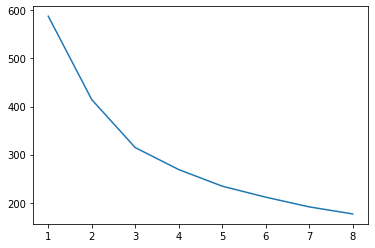

In [46]:
k_range = range(1, 9)
inertia = []
for i in k_range:
    km_cluster = KMeans(n_clusters = i, random_state = 42,init='k-means++')
    km_cluster.fit(OH_full_data)
    inertia.append(km_cluster.inertia_)
plt.plot(k_range,inertia)

- From the elbow method the optimum number of clustlers is 5.

#### Perform K-Mean clustler

In [25]:
km_cluster = KMeans(n_clusters = 5, random_state = 42,init='k-means++')
km_cluster.fit(OH_full_data)

KMeans(n_clusters=5, random_state=42)

In [26]:
print(km_cluster.cluster_centers_)

[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00 -2.77555756e-17
   1.00000000e+00 -1.73472348e-18 -3.46944695e-18  8.85245902e-01
   1.14754098e-01  1.00000000e+00  1.00000000e+00 -3.12756092e-01
  -2.06434015e-01]
 [ 2.81250000e-01  4.37500000e-01  1.56250000e-01  1.25000000e-01
   9.37500000e-01  3.12500000e-02  3.12500000e-02  5.93750000e-01
   4.06250000e-01  1.00000000e+00  1.00000000e+00 -2.45236531e-01
   1.94486724e+00]
 [ 6.76470588e-01  0.00000000e+00  2.35294118e-01  8.82352941e-02
   9.11764706e-01  2.94117647e-02  5.88235294e-02  7.64705882e-01
   2.35294118e-01  1.00000000e+00  1.00000000e+00 -1.99236664e-01
  -2.29044890e-01]
 [ 8.66666667e-01  1.33333333e-01  0.00000000e+00  2.77555756e-17
   9.33333333e-01  1.73472348e-18  6.66666667e-02  9.33333333e-01
   6.66666667e-02  1.00000000e+00  1.00000000e+00 -2.10167597e+00
  -9.83860662e-02]
 [ 2.28070175e-01  5.26315789e-01  1.22807018e-01  1.22807018e-01
   1.00000000e+00  1.73472348e-18  3.46944695e-18  9.12280702e-01


In [29]:
[i.mean() for i in km_cluster.cluster_centers_]

[0.3446776840756681,
 0.5153562080753908,
 0.35167064963674055,
 0.21537984313712485,
 0.41814428801275744]

In [30]:
data['labels'] = km_cluster.labels_
data

,Region,Place name,Place type,Price,Delivery option,Dine in option,Takeout option,Rating,Reviews,labels
0,Mariupol,Dim Kavu,Coffee shop,affordable,False,True,True,4.6,206.0,0
1,Mariupol,Коферум,Cafe,affordable,False,True,True,5.0,24.0,4
2,Mariupol,Кофейня Світ Чаю,Coffee shop,affordable,False,True,True,5.0,11.0,4
3,Mariupol,Кофейня Starcoff,Coffee shop,affordable,False,True,True,4.4,331.0,0
4,Mariupol,"Кофейня ""Friend Zone""",Coffee shop,affordable,False,True,True,5.0,12.0,4
...,...,...,...,...,...,...,...,...,...,...
195,Dnipro,Artist,Other,expensive,False,True,True,4.6,963.0,2
196,Dnipro,Dream Cafe,Cafe,affordable,False,True,True,4.3,646.0,3
197,Dnipro,РУТА КАФЕ ПП КУЛІЧЕНКО К.І.,Cafe,affordable,False,True,True,4.6,16.0,2
198,Dnipro,Ob'yektna Kava,Coffee shop,affordable,False,True,True,4.7,599.0,0


#### Model analysis

In [34]:
for i in range(5):
    print(i,'|',len(km_cluster.labels_[km_cluster.labels_== i]))

0 | 61
1 | 32
2 | 34
3 | 15
4 | 57


In [35]:
pd.crosstab(data['labels'],data['Region'])

Region,Dnipro,Kharkiv,Kherson,Khrivoy Rog,Kiev,Lviv,Mariupol,Odessa,Poltava,Zaporozhye
labels,,,,,,,,,,
0,4,12,10,3,2,7,5,7,5,6
1,3,3,1,1,7,8,0,3,4,2
2,5,3,5,7,2,0,5,0,2,5
3,5,1,0,4,0,0,1,0,3,1
4,3,1,4,5,9,4,9,10,6,6


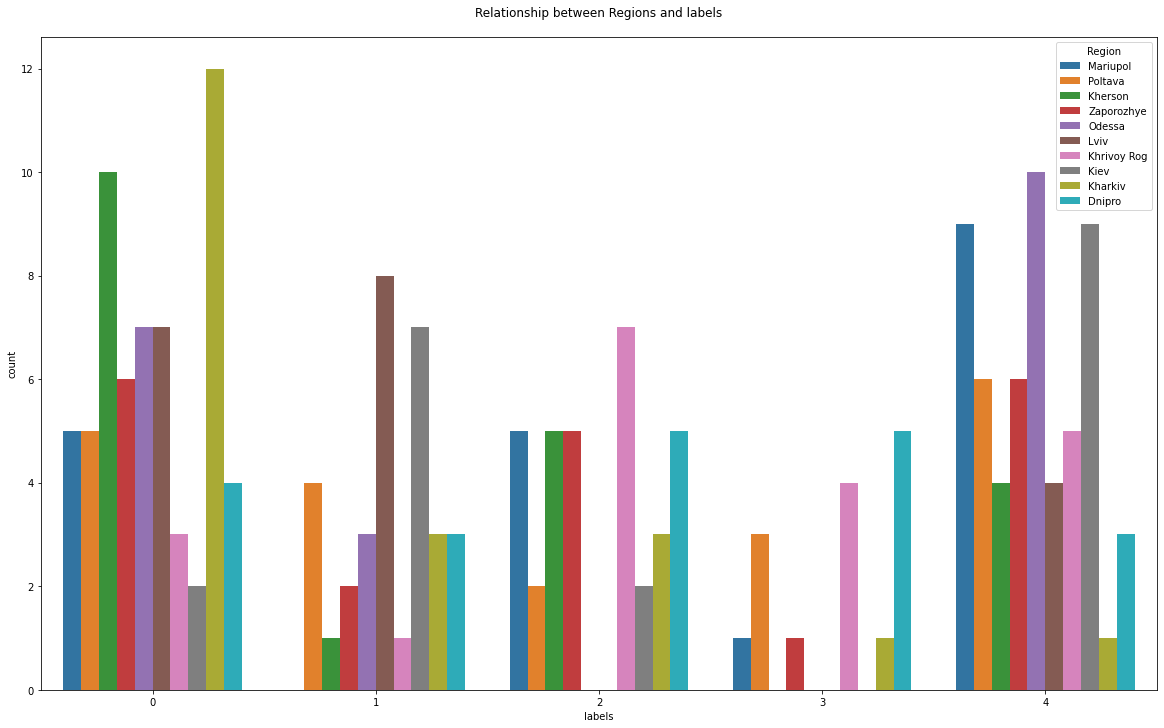

In [40]:
plt.figure(figsize=(20,12))
sns.countplot(x='labels',data=data,hue='Region')
plt.title("Relationship between Regions and labels\n")
plt.savefig(f'images/RegionVsLabels.png')
plt.show()

- we observe that labels 0 and 4 represent all the regions, 1 and 2 fewer regions and 3 some regions.

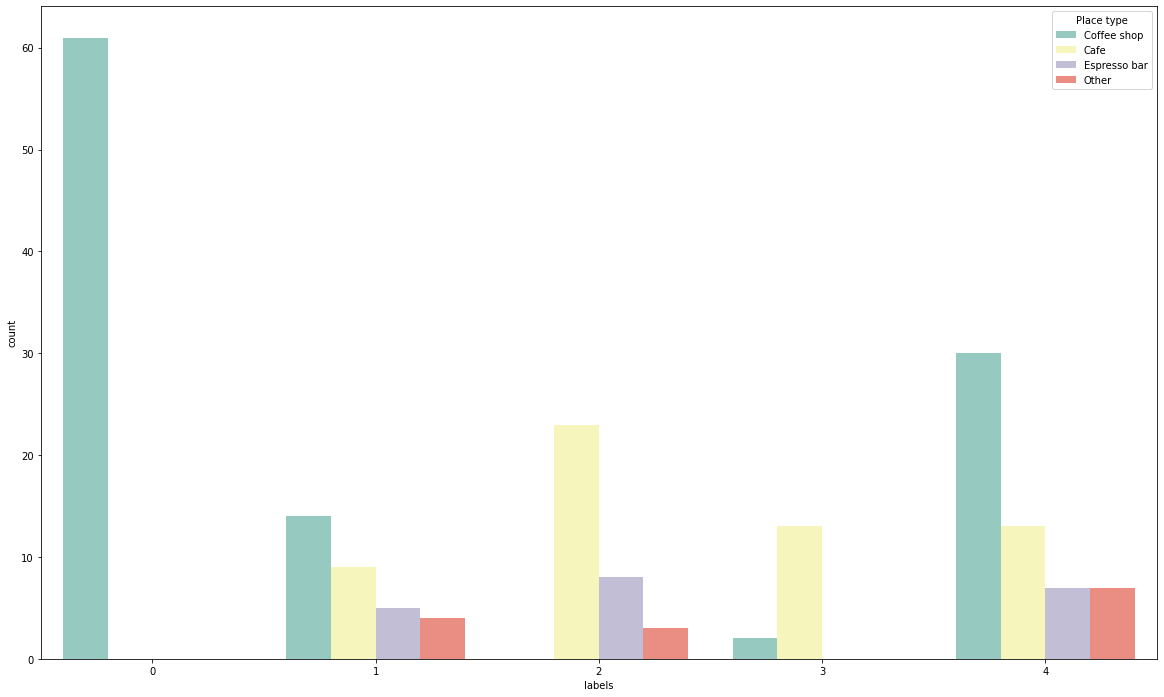

In [41]:
plt.figure(figsize=(20,12))
sns.countplot(x='labels',data=data,hue='Place type',palette="Set3")
plt.savefig(f'images/LabelsVsPlace.png')
plt.show()

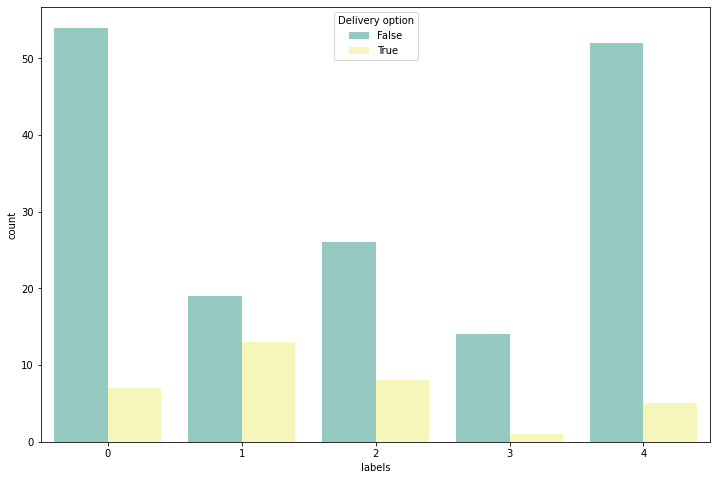

In [42]:
plt.figure(figsize=(12,8))
sns.countplot(x='labels',data=data,hue='Delivery option',palette="Set3")
plt.savefig(f'images/LabelsVsDelivery.png')
plt.show()

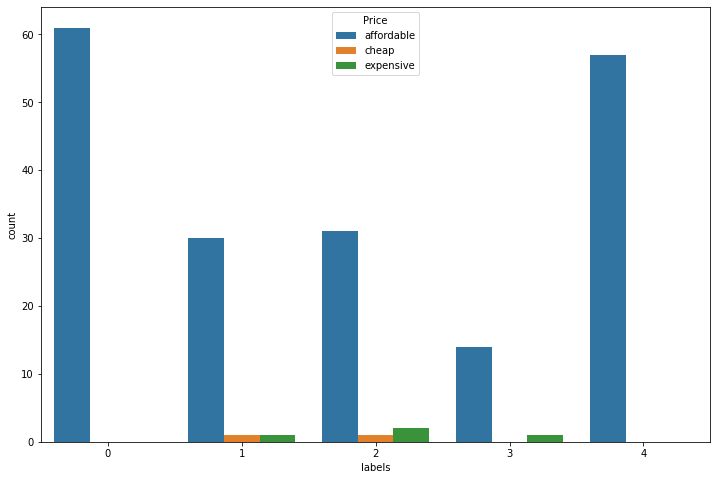

In [43]:
plt.figure(figsize=(12,8))
sns.countplot(x='labels',data=data,hue='Price')
plt.savefig(f'images/LabelsVsPrice.png')
plt.show()

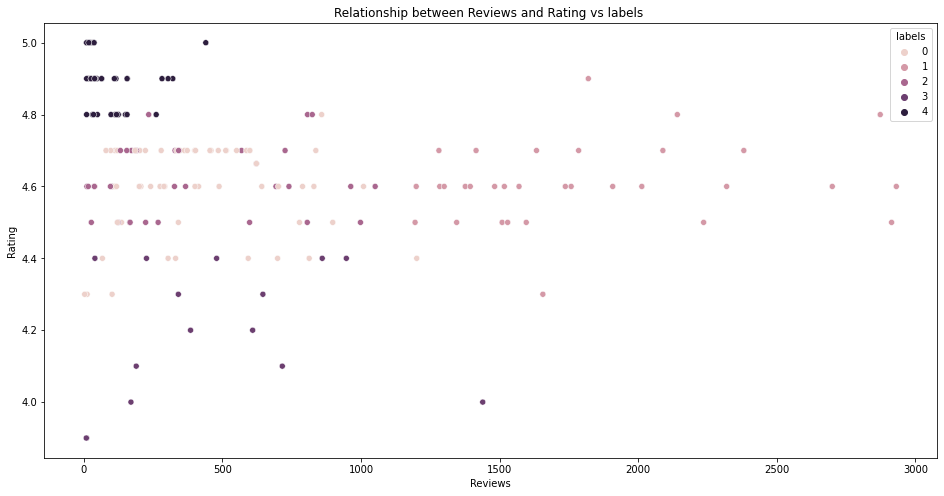

In [45]:
plt.figure(figsize=(16,8))
sns.scatterplot(x = 'Reviews', y = 'Rating', hue = 'labels', data = data)
plt.title('Relationship between Reviews and Rating vs labels ')
plt.show()

- Clusters with label 4 are highly rated. 

# Coclusion

- The main objectifs of this case study is to  identify the main segments and their key features by understanding the exsiting coffee shops in this market.
- With the help of elbow method we found that the optimum number of clusters is 5.
- To improve the segmentation of the model, adding new features to the datasets and  feature engineering practices can be applied.

#### Recommendations

- Segmenting the market into 5 regions will help to enter the coffee market in Ukraine.
- For more competition in this market management must match price with shops that have more affordable prices, Offer all the options Delivery,take out and dine in.
- To be highly rated and get more reviews opening a coffe shop at the begining will be a better decision in this market.

# References 
- https://s3.amazonaws.com/talent-assets.datacamp.com/case_study_sample.pdf
- https://www.cbi.eu/market-information/coffee/trade-statistics
- https://www.statista.com/outlook/cmo/hot-drinks/coffee/ukraine
- https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891
- https://s3.amazonaws.com/talent-assets.datacamp.com/case_study_sample.pdf